# Проект по анализу оттока клиентов банка

## Описание

В региональном банке последнее время драматически повысился отток, это начинает становиться серьезной проблемой. Отдел маркетинга заказал исследование.

**Цели:**
- проанализировать клиентов банка 
- выделить сегменты клиентов, которые склонны уходить из банка

**Задачи:** 
- провести исследовательский анализ, включающий исследование корреляций и портретов клиентов
- выделить не мелкие, но компактные высокоотточные сегменты, приоритизировать их
- проверить статистические гипотезы:

    *1. Гипотеза различия дохода между теми клиентами, которые ушли, и теми, которые остались.*

    *2. Гипотеза равенства долей уходящих и остающихся клиентов в конкретных городах, где есть отделения банка*

- сделать выводы о том, какие признаки стретегическим образом влияют на отток и какие значения или интервалы этих признаков связаны с оттоком   
- дать конкретные рекоменации мероприятий по приоритетным сегментам 
- подготовить отчет-презентацию со всеми ключевыми моментами для отдела маркетинга

## Описание данных

`userid` — идентификатор пользователя,

`score` — баллы кредитного скоринга,

`city` — город,

`gender` — пол,

`age` — возраст,

`equity` — приблизительная оценка собственности клиента,

`balance` — баланс на счёте,

`products` — количество продуктов, которыми пользуется клиент,

`credit_card` — есть ли кредитная карта,

`last_activity` — был ли клиент активен последнее время,

`est_salary` — заработная плата клиента,

`churn` — уходит или нет.

## Презентация (pdf)

[Презентация исследования](https://drive.google.com/file/d/1RKAv8qEEzXlwOUnVrc3FvUx8F62KWYUF/view?usp=share_link)

## Дашборд

### Описание дашборда

1. Построить диаграмму, отражающую количество клиентов в зависимости от числа используемых продуктов.
2. Добавить индикатор процента ушедших клиентов.
3. Добавить фильтр дашборда по городу.

[Дашборд - количество клиентов в зависимости от числа используемых продуктов](https://public.tableau.com/app/profile/yuriy7350/viz/banks_churn/Dashboard1)

## Откроем и изучим общую информацию о данных

In [ ]:
! gdown -- 1mKu-ZQv3rcgKBJiGN_zef-AZpTfNEhS8

Downloading...
From: https://drive.google.com/uc?id=1mKu-ZQv3rcgKBJiGN_zef-AZpTfNEhS8
To: /content/bank_scrooge.csv
100% 646k/646k [00:00<00:00, 79.2MB/s]


In [ ]:
%%capture
# install phik (if not installed yet)
import sys

!"{sys.executable}" -m pip install phik

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go
import numpy as np
import pylab 
import math as mth
#from datetime import datetime, timedelta

from scipy import stats as st
#from scipy.stats import mode

from pandas.plotting import register_matplotlib_converters

import phik
from phik.report import plot_correlation_matrix
from phik import report

pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_colwidth', None)

In [ ]:
try:
    path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F"
    df = pd.read_csv(path)
except:
    df = pd.read_csv('/content/bank_scrooge.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [ ]:
df.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1


Датасет открылся без замечаний. Типы столбцов в норме.

## Выполним предобработку данных

Исправим наименования в столбцах на корректные

In [ ]:
df.columns = df.columns.str.lower()

Исследуем дубликаты

In [ ]:
df.duplicated().sum()

1

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

Выполним еще одну проверку. Посмотрим дубликаты по столбцам `userid`. `city`, `gender`, `age` .

In [ ]:
len(df[df.duplicated(subset=['userid', 'city', 'gender', 'age'])==True])

16

In [ ]:
users_duplicated = df[df.duplicated(subset=['userid', 'city', 'gender', 'age'])==True]['userid'].tolist()


In [ ]:
df.query('userid in @users_duplicated').sort_values(['userid'])

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3668,185829,925.00,Ярославль,М,40,0,NaN,1,1,0,"228,305.64",0
9632,185829,927.00,Ярославль,М,40,0,NaN,1,1,0,"231,254.86",0
9380,187459,894.00,Рыбинск,М,48,0,NaN,1,1,0,"178,012.28",0
4720,187459,895.00,Рыбинск,М,48,0,NaN,1,1,0,"180,887.50",0
918,187635,918.00,Ярославль,Ж,44,0,NaN,1,1,1,"162,497.52",0
2165,187635,692.00,Ярославль,Ж,44,0,NaN,1,1,1,"160,368.82",0
1181,198635,896.00,Ярославль,Ж,32,0,NaN,1,1,1,"170,866.01",0
8015,198635,670.00,Ярославль,Ж,32,0,NaN,1,1,1,"168,699.33",0
9301,202983,942.00,Ростов,Ж,39,0,NaN,1,1,1,"163,804.73",0
8897,202983,941.00,Ростов,Ж,39,0,NaN,1,0,1,"159,348.84",0


Интересная картина. У 16 клиентов есть клиенты-дублеры. У них совпадают id, города, пол, возраст. Суммы на счетах, зарплаты и рейтинги при этом разные. Возможно, ошибки вызваны некорректным обновлением данных, и прошлые записи просто не удалено. Хорошо, что почти все клиенты-дублеры не собираются уходить, то есть находятся в одной из двух ключевых групп нашего исследования. Но клиенты с id 227795 из Рыбинска - один уходит, второй нет. Исключим его из дальнейшего исследования, чтобы они не давали ошибки при проверке статистических гипотез.

In [ ]:
df = df.loc[df['userid'] != 227795].copy()

In [ ]:
len(df[df.duplicated(subset=['userid', 'city', 'gender', 'age'])==True]) / len(df) * 100

0.15004501350405122

Даже если в датафреме действительно остались дубликаты, в чем мы не уверены и уж точно не можем знать, какая из двух строк корректная, их всего 0,15%. Решаем оставить , как есть. 

Проверим, что с дубликатами id? 

In [ ]:
df.query('userid not in @users_duplicated')\
    [df.query('userid not in @users_duplicated')\
     .duplicated(subset=['userid'],keep=False)]\
     .sort_values(['userid'])

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.00,Ярославль,Ж,55,1,"362,756.49",3,0,1,"175,920.48",1
7694,116540,887.00,Ярославль,Ж,38,0,NaN,1,0,1,"119,247.61",0
7542,117943,880.00,Ярославль,Ж,40,0,NaN,1,1,0,"137,718.93",0
4866,117943,855.00,Рыбинск,Ж,32,6,"1,036,832.93",4,1,1,"107,792.71",1
5896,120258,905.00,Ярославль,М,30,0,NaN,1,1,1,"146,427.96",0
...,...,...,...,...,...,...,...,...,...,...,...,...
2302,220816,934.00,Ярославль,Ж,74,5,"1,294,285.39",3,1,0,"95,606.80",0
2597,226719,990.00,Ярославль,М,37,4,"14,648,692.14",2,0,0,"934,412.61",1
4216,226719,903.00,Ярославль,Ж,63,0,NaN,1,1,0,"138,582.58",0
6457,228075,839.00,Ярославль,М,39,5,"507,199.85",3,0,1,"85,195.80",0


id совпадает еще у 112 человек, но это все-таки разные люди. 

Исследуем пропуски и попробуем объяснить их природу.

In [ ]:
df.isna().mean()

userid          0.00
score           0.00
city            0.00
gender          0.00
age             0.00
equity          0.00
balance         0.23
products        0.00
credit_card     0.00
last_activity   0.00
est_salary      0.00
churn           0.00
dtype: float64

В балансе на счету пропуски у 23-х % клиентов. Почти четверть. Попробуем установить природу этих пропусков. Для начала сравним гистограммы столбцов датасета с гистограммами тех же столбцов, но где задействованы строки, в которых в столбце `balance` стоит пропуск. 

Text(0.5, 1.0, 'Гистограммы всего датасета')

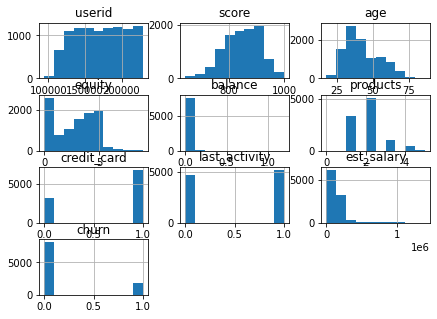

In [ ]:
df.hist(figsize=(7, 5))
pylab.title ("Гистограммы всего датасета")

Text(0.5, 1.0, 'Гистограммы строк с пропуском в столбце "balance"')

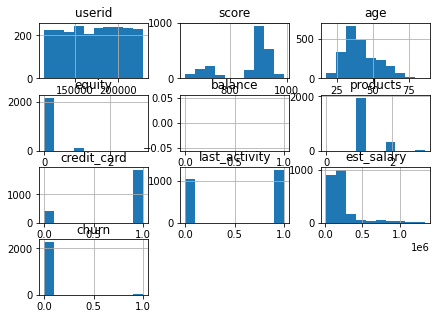

In [ ]:
df[df['balance'].isnull()].hist(figsize=(7, 5))
pylab.title ('Гистограммы строк с пропуском в столбце "balance"')

Поверхностое визуальное сравнение двух наборов гистограмм показывает сильные отличия в столбцах `score`, `equity`, `products`, `est_salary`. Рассмотрим их подробнее, подкрасим строки, в которых в столбце `balance` пропуски. 

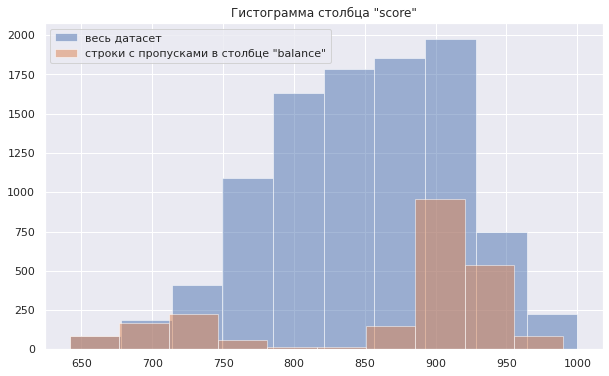

In [ ]:
x = df['score']
y = df[df['balance'].isnull()]['score']

sns.set(rc = {'figure.figsize':(10, 6)})

plt.hist(x, alpha=0.5, label='весь датасет')
plt.hist(y, alpha=0.5, label='строки с пропусками в столбце "balance"')

plt.title('Гистограмма столбца "score"')
plt.legend(loc='upper left')
plt.show()

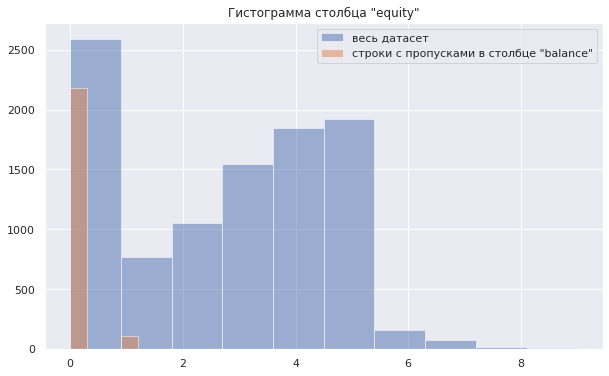

In [ ]:
x = df['equity']
y = df[df['balance'].isnull()]['equity']

sns.set(rc = {'figure.figsize':(10, 6)})

plt.hist(x, alpha=0.5, label='весь датасет')
plt.hist(y, alpha=0.5, label='строки с пропусками в столбце "balance"')

plt.title('Гистограмма столбца "equity"')
plt.legend(loc='upper right')
plt.show()

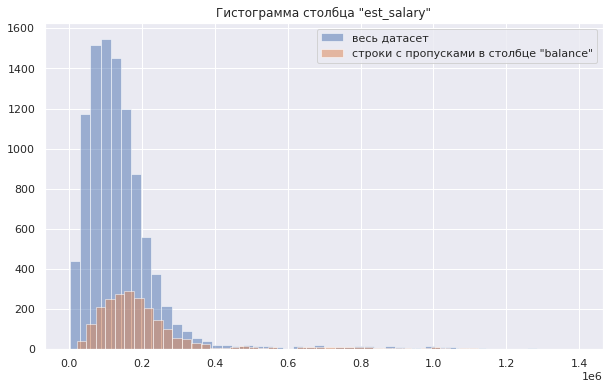

In [ ]:
x = df['est_salary']
y = df[df['balance'].isnull()]['est_salary']

sns.set(rc = {'figure.figsize':(10, 6)})

plt.hist(x, alpha=0.5, bins=50, label='весь датасет')
plt.hist(y, alpha=0.5, bins=50, label='строки с пропусками в столбце "balance"')

plt.title('Гистограмма столбца "est_salary"')
plt.legend(loc='upper right')
plt.show()

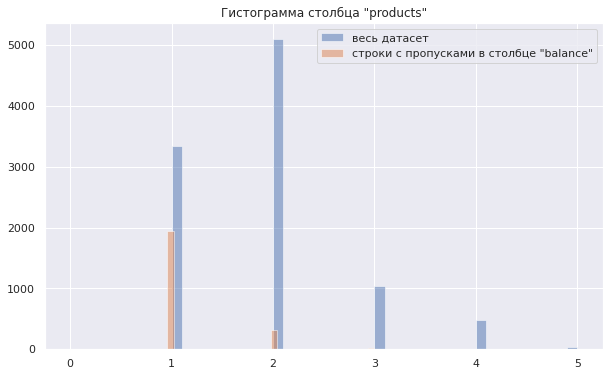

In [ ]:
x = df['products']
y = df[df['balance'].isnull()]['products']

sns.set(rc = {'figure.figsize':(10, 6)})

plt.hist(x, alpha=0.5, bins=50, label='весь датасет')
plt.hist(y, alpha=0.5, bins=50, label='строки с пропусками в столбце "balance"')

plt.title('Гистограмма столбца "products"')
plt.legend(loc='upper right')
plt.show()

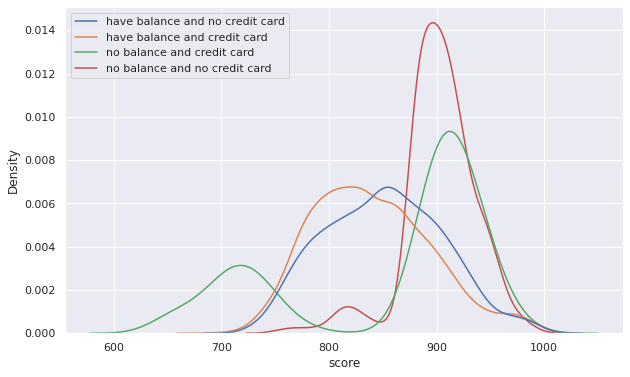

In [ ]:
nan_bal_cc_groups = df.balance.isna().map({False:"have balance ",True:"no balance "})\
                  + df.credit_card.map({1:"and credit card",0:"and no credit card"})

sns.kdeplot(data=df,hue=nan_bal_cc_groups,x='score',common_norm=False);

У многих клиентов, которые имеют пропуски в столбце с балансом на счете, низкие баллы кредитного скоринга, один банковский продукт, а у большинства таких клиентов ноль баллов по шкале приблизительной оценки собственности и нет кредитной карты. Вполне возможно, на их счетах минимальные суммы, которые не были учтены при выгрузке, в результате чего в соответствующем столбце появились пропуски. Либо присутствует ошибка при выгрузке. Считаем нужным оставить пропуски без изменений. В исследовании статистических гипотез данный столбец участвовать не будет.  

Исследуем аномальные значения в столбце `products`

In [ ]:
df['products'].value_counts()

2    5107
1    3339
3    1046
4     474
5      30
0       1
Name: products, dtype: int64

Отдел маркетинга сообщил, что у клиентов хотя бы один банковский продукт, следовательно, ноль продуктов - это аномалия, избавимся от нее.  

In [ ]:
df = df.loc[df['products'] != 0].copy()

Переведем столбец `churn` в удобочитаемый (в новом столбце)

In [ ]:
df['churn_new'] = df['churn'].apply(lambda x: 'уходит' if x == 1 else 'не уходит').copy() 

Закодируем числами столбец с категориалными упорядоченными данными `gender` и категориальными неупорядоченными данными `city`. Это необходимо, чтобы можно было проводить полноценное исследование, вычислять среднее, медиану и моду по всем показателям. Закодированные данные поместим в новые столбцы.

In [ ]:
df['gender_new'] = df['gender'].apply(lambda x: 1 if x == "М" else 0).copy() 

Для перекодирования столбца `city` применим тип  кодирования one-hot.

In [ ]:
df = pd.concat((df,pd.get_dummies(df.city)),1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


Предобработка данных окончена. Типы в норме, дубликаты удалены, аномальные значения тоже, названия столбцов сделали корректными, предположили природу пропусков (минимальный баланс на счету, который не был учтен при выгрузке) и решили оставить их без изменения, закодировали столбцы с категориальными значениями.
Приступаем к анализу.

## Исследовательский анализ данных

### Исследуем столбцы с количественными данными

In [ ]:
df.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_new,Ростов,Рыбинск,Ярославль
count,"9,996.00","9,996.00","9,996.00","9,996.00","7,703.00","9,996.00","9,996.00","9,996.00","9,996.00","9,996.00","9,996.00","9,996.00","9,996.00","9,996.00"
mean,"171,808.90",848.68,42.84,2.63,"827,921.30",1.87,0.68,0.52,"147,864.80",0.18,0.50,0.14,0.27,0.59
std,"33,703.50",65.45,12.12,1.98,"1,980,855.59",0.80,0.47,0.50,"139,389.87",0.39,0.50,0.35,0.44,0.49
min,"94,561.00",642.00,18.00,0.00,0.00,1.00,0.00,0.00,"2,546.30",0.00,0.00,0.00,0.00,0.00
25%,"142,810.25",802.00,34.00,0.00,"295,498.98",1.00,0.00,0.00,"75,251.90",0.00,0.00,0.00,0.00,0.00
50%,"172,728.00",853.00,40.00,3.00,"524,295.33",2.00,1.00,1.00,"119,686.48",0.00,1.00,0.00,0.00,1.00
75%,"201,260.25",900.00,51.00,4.00,"980,801.49",2.00,1.00,1.00,"174,500.54",0.00,1.00,0.00,1.00,1.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00,1.00,1.00,1.00,1.00


Вдохновляют максимальные значения ожидаемой зарплаты и баланса на счету. Также интересен клиент с максимальным баллом по кредитному скорингу и самый возрастной клиент. Найдем их.

In [ ]:
print('Рекордсмен по балансу на счете:')
display(df.loc[df['balance'] == df.describe().loc['max', 'balance']])
print()
print('Рекордсмен по ожидаемой зарплате:')
display(df.loc[df['est_salary'] == df.describe().loc['max', 'est_salary']])
print()
print('Рекордсмены по баллу кредитного скоринга:')
display(df.loc[df['score'] == df.describe().loc['max', 'score']])
print()
print('Рекордсмен по возрасту:')
display(df.loc[df['age'] == df.describe().loc['max', 'age']])

Рекордсмен по балансу на счете:


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,churn_new,gender_new,Ростов,Рыбинск,Ярославль
7597,156149,900.00,Ярославль,М,62,5,"119,113,552.01",2,1,1,"138,041.31",0,не уходит,1,0,0,1



Рекордсмен по ожидаемой зарплате:


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,churn_new,gender_new,Ростов,Рыбинск,Ярославль
4005,163640,912.00,Ярославль,М,35,4,"15,624,095.80",2,0,1,"1,395,064.45",0,не уходит,1,0,0,1



Рекордсмены по баллу кредитного скоринга:


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,churn_new,gender_new,Ростов,Рыбинск,Ярославль
125,227092,"1,000.00",Ярославль,М,32,5,"19,757,180.85",2,1,1,"1,024,626.50",0,не уходит,1,0,0,1
1027,119793,"1,000.00",Ярославль,М,50,5,"12,909,691.02",1,1,0,"1,253,653.40",0,не уходит,1,0,0,1
3348,193457,"1,000.00",Ярославль,Ж,34,4,"10,885,990.87",4,1,1,"799,847.28",0,не уходит,0,0,0,1
4721,228786,"1,000.00",Ярославль,М,45,5,"29,008,931.92",2,0,1,"811,804.54",0,не уходит,1,0,0,1
6948,137434,"1,000.00",Ярославль,М,37,4,"20,906,155.51",2,1,1,"947,606.60",1,уходит,1,0,0,1
8484,221720,"1,000.00",Ярославль,Ж,35,5,"21,549,943.63",2,0,0,"1,051,902.65",0,не уходит,0,0,0,1



Рекордсмен по возрасту:


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,churn_new,gender_new,Ростов,Рыбинск,Ярославль
9176,116838,777.00,Ярославль,Ж,86,3,"772,929.83",1,1,1,"40,877.18",0,не уходит,0,0,0,1
9413,135210,921.00,Ярославль,Ж,86,0,NaN,1,0,1,"36,185.91",0,не уходит,0,0,0,1


Вот они - рекордсмены. Все из областного центра - Ярославля. Радует, что только один из них сообрался уходить, тот, кто входит в группу лидеров по кредитному скорингу. В этой группе шестеро, и с балансом на счете и зарплатой у них все в порядке.

Посмотрим на выбросы.

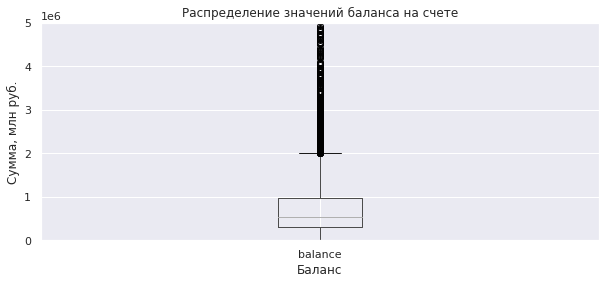

In [ ]:
df[['balance']].boxplot(figsize=(10, 4))

plt.ylim([0,5000000])
plt.title('Распределение значений баланса на счете')
plt.ylabel('Сумма, млн руб.')
plt.xlabel('Баланс');

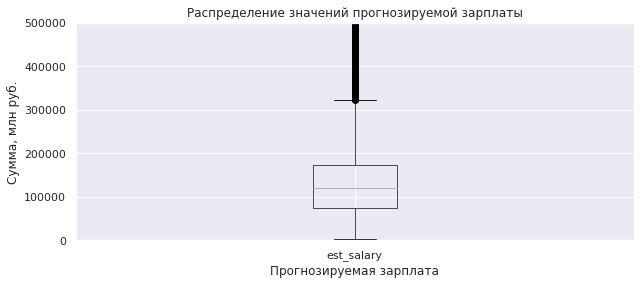

In [ ]:
df[['est_salary']].boxplot(figsize=(10, 4))

plt.ylim([0,500000])
plt.title('Распределение значений прогнозируемой зарплаты')
plt.ylabel('Сумма, млн руб.')
plt.xlabel('Прогнозируемая зарплата');

Значительные выбросы по балансу и зарплате. И это радует. Значит, у банка немало богатых клиентов, которые выбиваются из общей картины, но важно, что они - клиенты банка. Возьмем это во внимание при дальнейшем исследовании. 

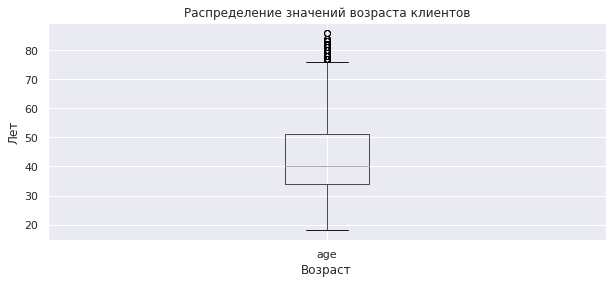

In [ ]:
df[['age']].boxplot(figsize=(10, 4))

plt.title('Распределение значений возраста клиентов')
plt.ylabel('Лет')
plt.xlabel('Возраст');

Правый квартиль упирается в значение 75 лет - до этого возраста есть активные клиенты банка и с ними можно работать. Медианный возраст - 40. Клиентское ядро - граждане возраста 35-50.

### Исследуем столбцы с категориальными данными

In [ ]:
df['city'].value_counts(normalize = True)

Ярославль   0.59
Рыбинск     0.27
Ростов      0.14
Name: city, dtype: float64

Можно порадоватьс за ожидаемые зарплаты в Ярославской области, судя по этому датасету.

In [ ]:
df['gender'].value_counts(normalize = True)

М   0.50
Ж   0.50
Name: gender, dtype: float64

Идеальное соотношение клиентов по гендерному признаку. 50\50 мужчин и женщин.

In [ ]:
df['credit_card'].value_counts(normalize = True)

1   0.68
0   0.32
Name: credit_card, dtype: float64

У трети клиентов нет кредиток банка.

In [ ]:
fig = px.bar(df['equity'].value_counts(normalize=True).round(2), text = 'value')

fig.update_layout(width=900, 
                  height=400,
                  title='Доля клиентов, исходя из приблизительной оценки их собственности',
                  xaxis_title='Оценка (1-9)',
                  yaxis_title='Доля')
fig.show() 

Клиентов с оценкой собственности 8 или 9 у банка нет вообще. У четверти клиентов оценка 0. Костяк - клиенты с оценкой собственности 4 и 5 (по 19% от всех клиентов).

Ну и самое интересное на данном этапе - а сколько их, клиентов, которые хотят уйти?

In [ ]:
churn_total = df['churn_new'].value_counts().reset_index().sort_values(by='index', ascending = False)
churn_total['Доля от общего числа клиентов, %'] = churn_total['churn_new'] / churn_total['churn_new'].sum() * 100
churn_total = churn_total.rename(columns={'index': 'Категория', 'churn_new': 'Количество клиентов'})
churn_total

,Категория,Количество клиентов,"Доля от общего числа клиентов, %"
1,уходит,1820,18.21
0,не уходит,8176,81.79


Более 18%, 1800 человек собирается уходить! Познакомимся с этими людьми поближе, равно как и с теми, кто остается. 

### Портреты клиентов на основе центральных тенденций характеристик

Сравним портреты уходящих и остающихся клиентов, составим центральные тенденции характеристик для одних и других. Оценим различия там, где это возможно.

`score`, `age` - считаем по медиане, чтобы защититься от выбросов.

`balance`, `est_salary` - считаем по среднему. Мы знаем, что там сильные выбросы больших значений, но это богатые клиенты.

`credit_card`, `gender_new`, `last_activity`, `Ростов`, `Рыбинск`, `Ярославль` - тоже по среднему. В этих столбцах бинарные значения. Среднее покажет долю клиентов, у которых этот показатель равен единице.

`equity`, `products` - по среднему. Это ординальные данные, у них есть чёткий порядок, распределение неравномерное.




In [ ]:
churn_1 = df[df['churn'] == 1]
churn_0 = df[df['churn'] != 1]

In [ ]:
churn_1 = churn_1.agg({'score' : 'median', 'age' : 'median',\
             'balance' : 'mean', 'est_salary' : 'mean',
             'credit_card' : 'mean', 'gender_new' : 'mean',
             'last_activity' : 'mean', 'Ростов': 'mean',\
             'Рыбинск': 'mean', 'Ярославль': 'mean',\
             'equity': 'mean', 'products': 'mean'})\
             .reset_index()

In [ ]:
churn_0 = churn_0.agg({'score' : 'median', 'age' : 'median',\
             'balance' : 'mean', 'est_salary' : 'mean',
             'credit_card' : 'mean', 'gender_new' : 'mean',
             'last_activity' : 'mean', 'Ростов': 'mean',\
             'Рыбинск': 'mean', 'Ярославль': 'mean',\
             'equity': 'mean', 'products': 'mean'})\
             .reset_index()

In [ ]:
churn_total = pd.merge(churn_1, churn_0, on='index')

In [ ]:
churn_total = pd.merge(churn_1, churn_0, on='index')
churn_total['% изменений'] = ((churn_total['0_x'] / churn_total['0_y'] *100)-100)

churn_total = churn_total.sort_values(by='% изменений', ascending=False)
churn_total = churn_total\
.rename(columns = {'index': 'Название столбца', '0_x': 'Центральная тенденция ушедших клиентов', '0_y':'Центральная тенденция остающихся клиентов'})

churn_total

,Название столбца,Центральная тенденция ушедших клиентов,Центральная тенденция остающихся клиентов,% изменений
10,equity,3.76,2.37,58.53
2,balance,"1,133,719.46","734,132.82",54.43
6,last_activity,0.70,0.48,45.39
5,gender_new,0.65,0.47,39.05
11,products,2.38,1.76,35.06
9,Ярославль,0.62,0.59,5.26
7,Ростов,0.15,0.14,4.00
0,score,866.00,848.00,2.12
3,est_salary,"148,293.00","147,769.48",0.35
1,age,39.00,40.00,-2.50


Отсортируем столбцы по проценту изменений центральных тенденций, где это возможно. В данном случае не важно, в большую или меньшую сторону этот процент, поэтому испоьзуем метод `abs()`.

In [ ]:
churn_total = churn_total.loc[churn_total['% изменений'] != 'изменений по моде нет']
churn_total = churn_total.loc[churn_total['% изменений'] != 'изменения по моде есть']

churn_total['% изменений'] = churn_total['% изменений'].abs().sort_values()

churn_total = churn_total.sort_values(by='% изменений', ascending=False)

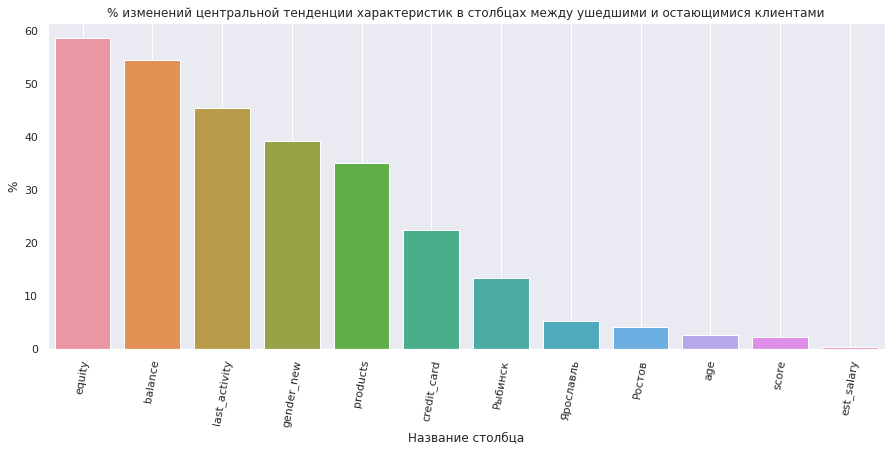

In [ ]:
plt.figure(figsize=(15, 6))

sns.barplot(x='Название столбца', y='% изменений', data=churn_total)

plt.title('% изменений центральной тенденции характеристик в столбцах между ушедшими и остающимися клиентами')
plt.xlabel('Название столбца')
plt.ylabel('%')

plt.grid()
plt.xticks(rotation=80)
plt.show()

Вот и первые зацепки. Делать однозначные выводы рано, этот график поможет нам расставить приоритеты при проверке влияния характеристик столбцов на вероятность ухода. Приступим.

## Анализ взаимосвязей

Для удобства работы создадим функцию.

In [ ]:
def influence_graph(colomn, bins, title, xlabel):
    """Эта функция содержит многострочный докстринг.

    Функция выводит гистограмму размером 18*6, отражающую распределение 
    значений столбца для уходящих и остающихся в банке клиентов. 
    На вход функция принимает название столбца, число корзин для разбивки значений, 
    строку с навазнием графика, строку с название оси x.
    В настройках гистограммы дополнительно выставлены параметры 

    stat='density'  
    (по умолчанию в данной настройке стоит 'count', показывающий количество
    наблюдений в каждом столбце, нам же нужна плотность ('density'),
    при такой настройке общая площадь гистограммы равняется 1)

    common_norm = False
    (для нормализации каждой гистограммы отдельно)"""
    plt.figure(figsize=(18, 6))
    sns.histplot(x=colomn, data=df, kde=True, hue='churn_new', bins=bins, stat='density', common_norm = False)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Плотность')
    plt.show()

### Влияние оценки собственности клиента на вероятность ухода (изменений центральных тенденций по моде нет)

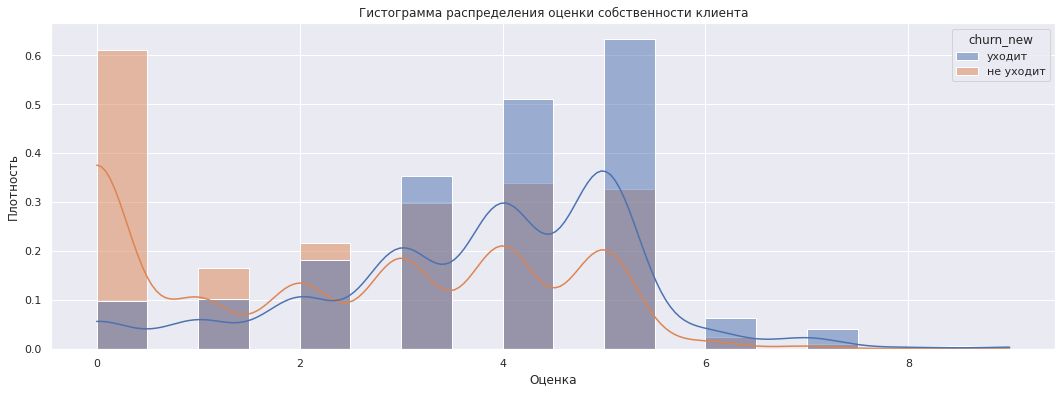

In [ ]:
influence_graph('equity', 18, 'Гистограмма распределения оценки собственности клиента', 'Оценка')

`equity` - уходят клиенты с рейтингом 3, 4, 5, 6, 7.

### Влияние баланса на счете на вероятность ухода

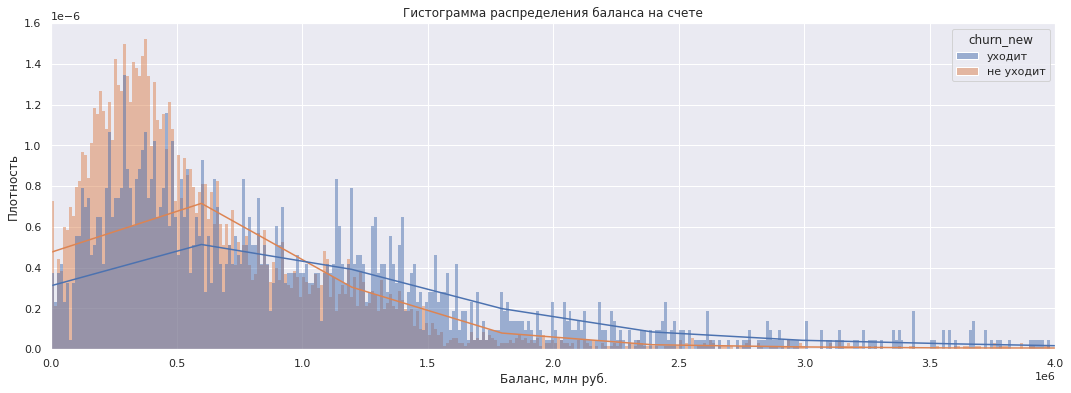

In [ ]:
plt.figure(figsize=(18, 6))

sns.histplot(x='balance', data=df, kde=True, hue='churn_new', bins=10000, stat='density', common_norm = False)

plt.xlim(0, 4000000)
plt.title('Гистограмма распределения баланса на счете')
plt.xlabel('Баланс, млн руб.')
plt.ylabel('Плотность')
plt.show();

`balance` - жирный хвост из уходящих, которые хранят на счетах суммы от 700000 рублей. Остающихся после этого рубежа заметно меньше, а ведь это ценные клиенты с деньгами (на графике распределения представленные как выбросы).

### Влияние последней активности на вероятность ухода

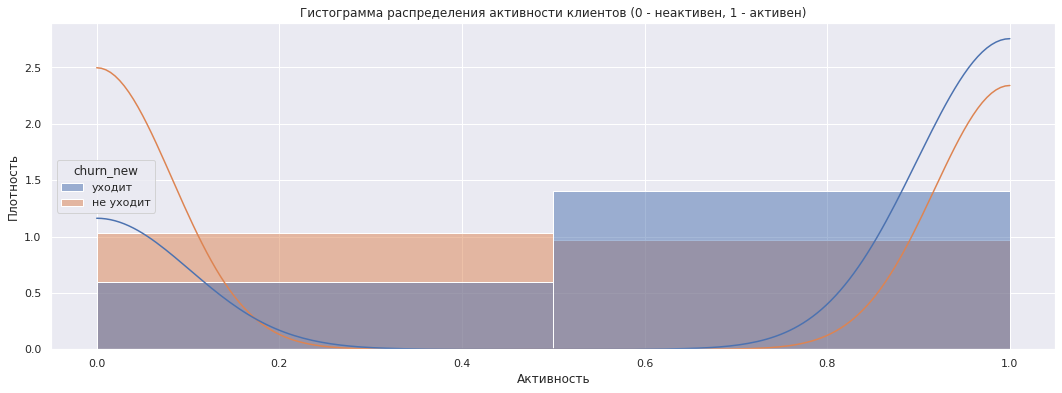

In [ ]:
influence_graph('last_activity', 2, 'Гистограмма распределения активности клиентов (0 - неактивен, 1 - активен)', 'Активность')

`last_activity` плотность активных уходящих на треть больше, чем активных остающихся. Среди неактивных клиентов плотность уходящих на половину меньше. 

### Влияние пола на вероятность ухода

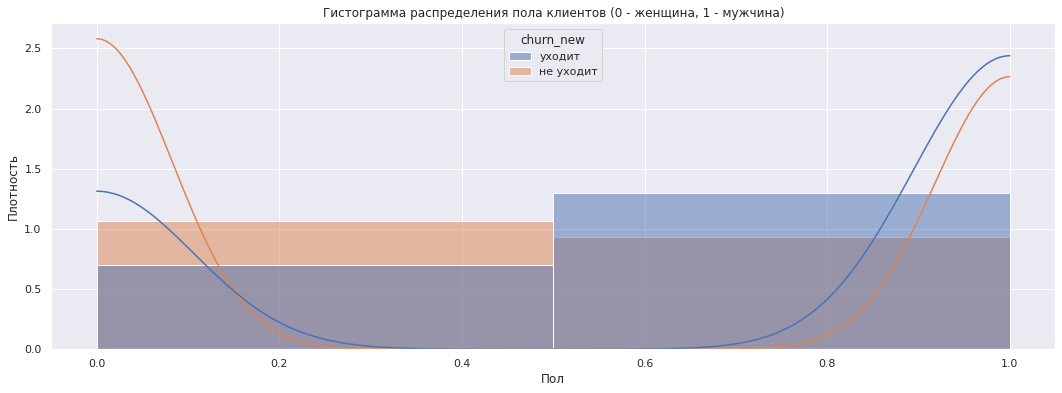

In [ ]:
influence_graph('gender_new', 2, 'Гистограмма распределения пола клиентов (0 - женщина, 1 - мужчина)', 'Пол')

`gender_new` мужчины уходят чаще женщин.

### Влияние количества продуктов, которыми пользуется клиент, на вероятность ухода (изменения центральной тенденции по моде есть)

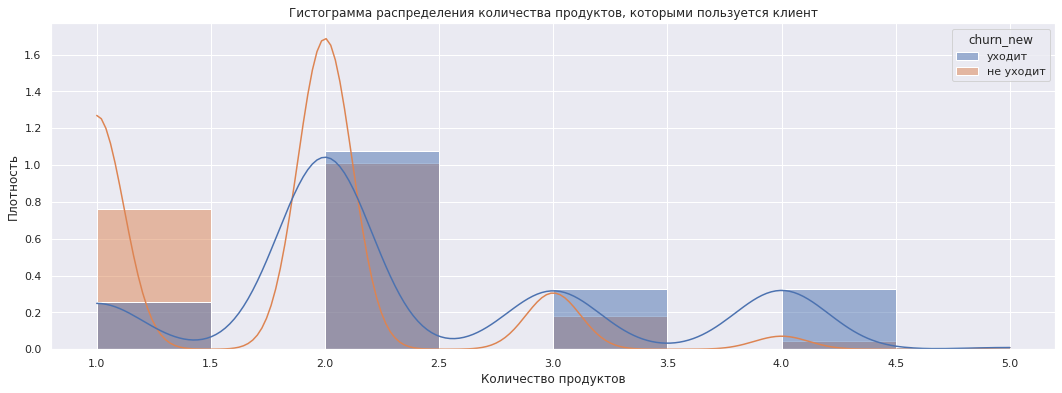

In [ ]:
influence_graph('products', 8, 'Гистограмма распределения количества продуктов, которыми пользуется клиент', 'Количество продуктов')

`products` - у уходящих клиентов по 2, 3, 4 продукта. Причем почти все клиенты, у которых 4 банковских продукта, собираются уходить.

### Влияние наличия кредитной карты на вероятность ухода

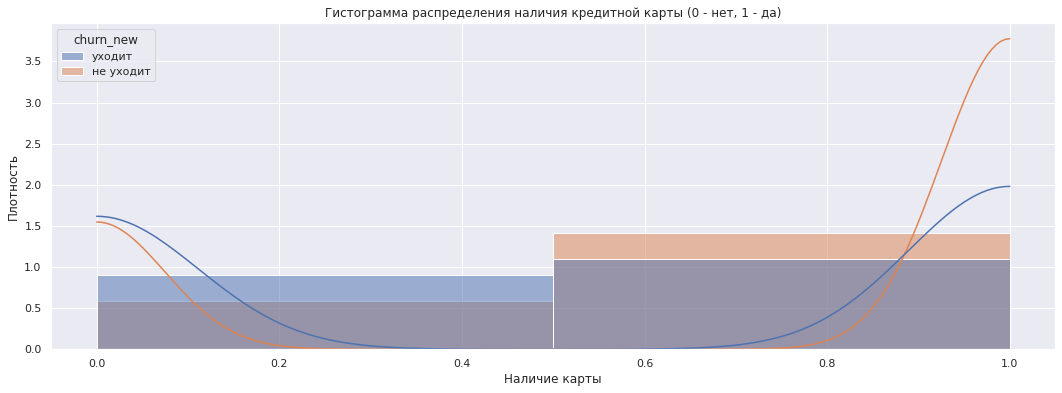

In [ ]:
influence_graph('credit_card', 2, 'Гистограмма распределения наличия кредитной карты (0 - нет, 1 - да)', 'Наличие карты')

`credit_card` клиенты с кредитками уходят чаще, чем клиенты без кредиток.

### Влияние возраста на вероятность ухода

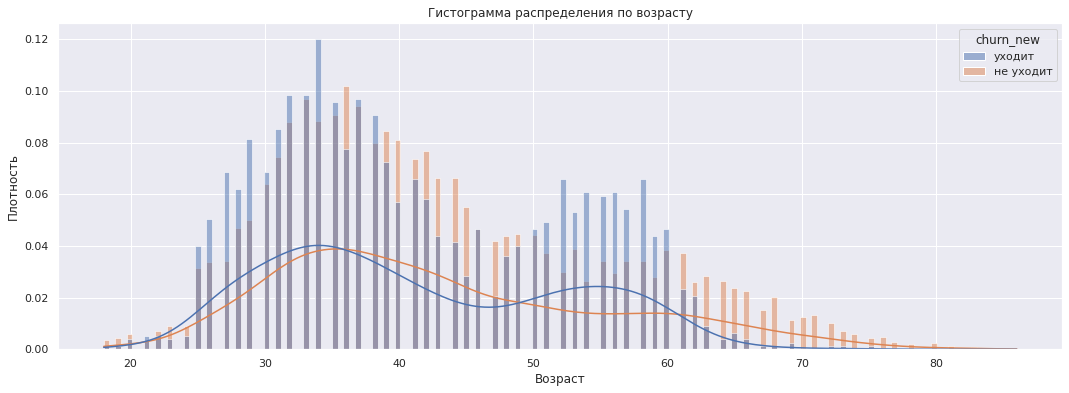

In [ ]:
influence_graph('age', 160, 'Гистограмма распределения по возрасту', 'Возраст')

`age` - уходят клиенты в возрасте 25-35 и 50-60.

### Влияние баллов скоринга на вероятность ухода

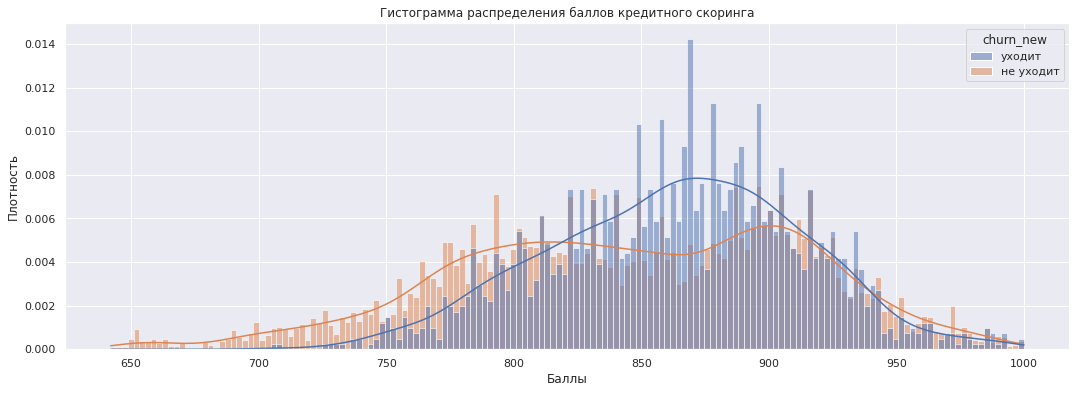

In [ ]:
influence_graph('score', 160, 'Гистограмма распределения баллов кредитного скоринга', 'Баллы')

`score` - уходят клиенты с рейтингом 825-900.

### Влияние зарплаты на вероятность ухода

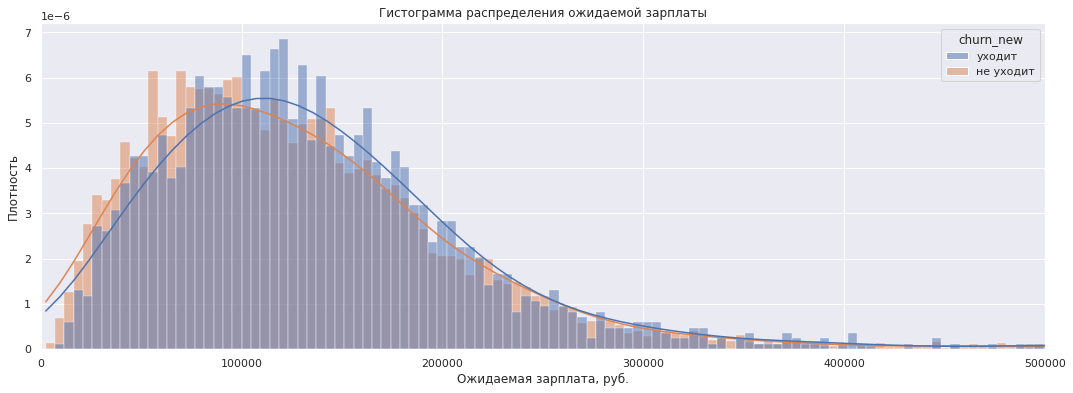

In [ ]:
plt.figure(figsize=(18, 6))

sns.histplot(x='est_salary', data=df, kde=True, hue='churn_new', bins=300, stat='density', common_norm = False)

plt.xlim(0, 500000)
plt.title('Гистограмма распределения ожидаемой зарплаты')
plt.xlabel('Ожидаемая зарплата, руб.')
plt.ylabel('Плотность')
plt.show();

`est_salary` - уходят клиенты с ожидаемой зарплатой 100000-200000 рублей.

### Влияние города на вероятность ухода

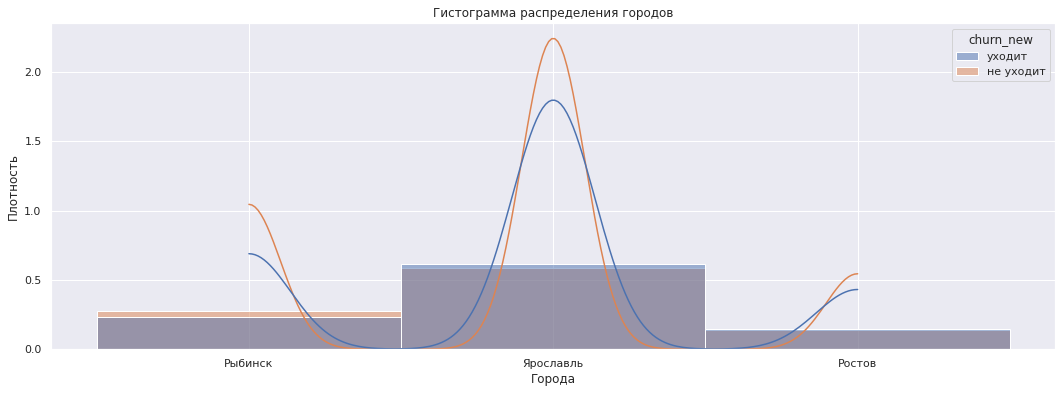

In [ ]:
influence_graph('city', 5, 'Гистограмма распределения городов', 'Города')

`city_new` - уходящие и остающиеся клиенты почти равномерно распределены по трем городам. Больше всего и тех и других в Ярославле.

Похоже, уходят экономически активные клиенты, которые знают, что такое банковские продукты, активно ими пользуются, сравнивают и выбирают лучшее. И что-то их не устраивает в этом банке. Клиенты с меньшим доходом, кредитным рейтингом и баллами активов - не особо активничают. Открыли счет, оформили кредитку, и все. 

## Проведем корреляционный анализ

In [ ]:
#interval_cols = ['score', 'age',	'equity',	'products']          
#phik_overview = df.phik_matrix(interval_cols=interval_cols)     
#phik_overview.round(2)

In [ ]:
phik_overview = df.phik_matrix()
phik_overview.round(2)

interval columns not set, guessing: ['userid', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'gender_new', 'Ростов', 'Рыбинск', 'Ярославль']


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,churn_new,gender_new,Ростов,Рыбинск,Ярославль
userid,1.00,0.06,0.03,0.06,0.00,0.07,0.03,0.10,0.04,0.07,0.00,0.14,0.14,0.06,0.04,0.00,0.01
score,0.06,1.00,0.09,0.07,0.04,0.53,0.17,0.42,0.21,0.05,0.40,0.23,0.23,0.07,0.09,0.03,0.09
city,0.03,0.09,1.00,0.01,0.09,0.07,0.04,0.13,0.08,0.03,0.17,0.02,0.02,0.01,1.00,1.00,1.00
gender,0.06,0.07,0.01,1.00,0.31,0.06,0.05,0.07,0.20,0.01,0.14,0.22,0.22,1.00,0.02,0.01,0.03
age,0.00,0.04,0.09,0.31,1.00,0.09,0.03,0.15,0.17,0.09,0.37,0.19,0.19,0.31,0.06,0.06,0.10
equity,0.07,0.53,0.07,0.06,0.09,1.00,0.00,0.59,0.22,0.05,0.29,0.35,0.35,0.06,0.07,0.00,0.06
balance,0.03,0.17,0.04,0.05,0.03,0.00,1.00,0.00,0.00,0.00,0.37,0.02,0.02,0.05,0.00,0.02,0.05
products,0.10,0.42,0.13,0.07,0.15,0.59,0.00,1.00,0.27,0.11,0.22,0.26,0.26,0.07,0.05,0.09,0.11
credit_card,0.04,0.21,0.08,0.20,0.17,0.22,0.00,0.27,1.00,0.05,0.04,0.20,0.20,0.20,0.15,0.08,0.18
last_activity,0.07,0.05,0.03,0.01,0.09,0.05,0.00,0.11,0.05,1.00,0.05,0.26,0.26,0.01,0.00,0.07,0.07


Построим хитмэп на  основе матрицы.

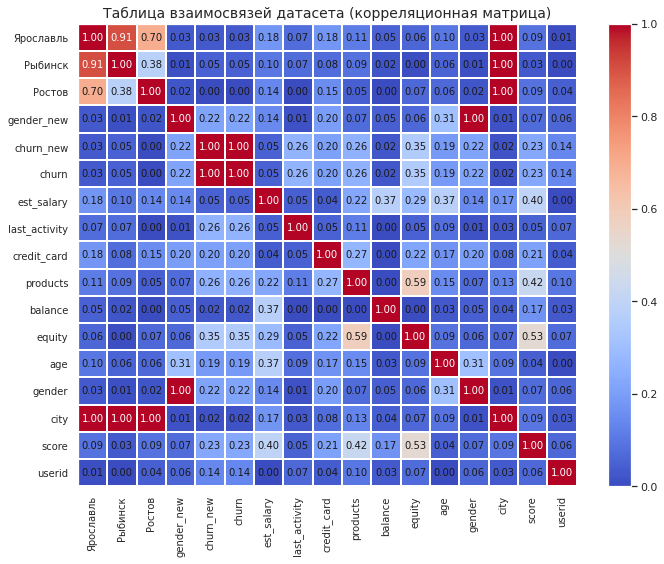

In [ ]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title=r"Таблица взаимосвязей датасета (корреляционная матрица)", 
                        fontsize_factor=1, 
                        figsize=(10, 8))
plt.tight_layout()

Выделим ключевой столбец `churn` и отсортируем его. 

In [ ]:
values = phik_overview['churn'].round(2).sort_values().drop(['churn', 'churn_new']).to_numpy()
values.shape = (len(values), 1)

columns = np.array(['churn'])

index = phik_overview['churn'].round(2).sort_values().drop(['churn', 'churn_new']).reset_index()['index'].to_numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



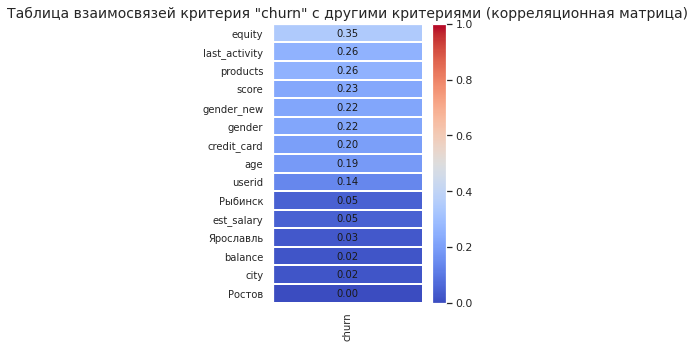

In [ ]:
plot_correlation_matrix(values, 
                        x_labels=columns, 
                        y_labels=index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title=r'Таблица взаимосвязей критерия "churn" c другими критериями (корреляционная матрица)', 
                        fontsize_factor=1)

plt.tight_layout()

Согласно шкале Чеддока, сильная корреляция у `Ярославля` и `Рыбинcка`, высокая у `Ярославля` и `Ростова`. Заметная корреляция между баллами кредитного скоринга `score` и баллами по активам недвижимости `equity`, а также баллами по активам недвижимости `equity` и числом продукто банка `products`.

Что касается корреляции уходящих и остающихся `churn` с другими критериями, умеренная корреляция разве что с баллами по активам недвижимости `equity`.
Корреляции между влиянием уходящих и остающихся на зарплаты и баланс с их выбросами не обнаружено.

Пора проверить статистические гипотезы. 

## Проверим статистические гипотезы

### Гипотеза 1

В начале исследования мы выяснили, что id клиентов даже из одного города повторяются. Посмотрим, сколько пересекающихся по id клиентов?

In [ ]:
df.groupby('churn').agg({'userid': 'nunique'}).sum()[0] - df['userid'].nunique()

49

In [ ]:
(df.groupby('churn').agg({'userid': 'nunique'}).sum()[0] - df['userid'].nunique()) / len(df) * 100

0.49019607843137253

49 id пересекается. Полпроцента. Принимаем решение найти и исключить эти id из проверки статгипотез для чистоты экспреимента.

In [ ]:
user_1 = df.query('churn == 1').agg({'userid': 'unique'}) #уходящие клиенты
user_0 = df.query('churn != 1').agg({'userid': 'unique'}) #остающиеся клиенты
 
user_duplicates = list(set(user_1[0]).intersection(set(user_0[0])))
test = df.query('userid != @user_duplicates').copy()

test.groupby('churn').agg({'userid': 'nunique'}).sum()[0] - test['userid'].nunique()

0

In [ ]:
test['churn'].value_counts(normalize=True)

0   0.82
1   0.18
Name: churn, dtype: float64

Разница в группах значительная. Посмотрим на распределение значений через boxplot.

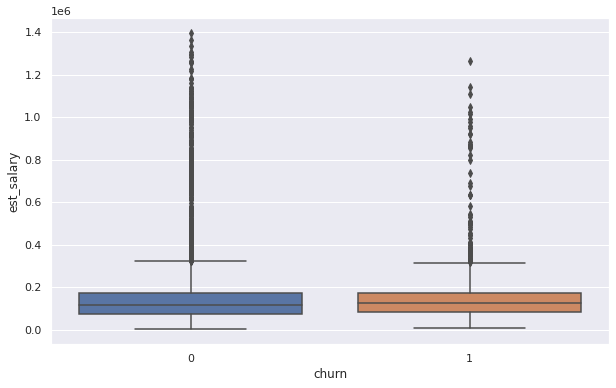

In [ ]:
sns.boxplot(data=test, x="churn", y="est_salary");

Медианы, 25-й и 75-й процентиль, усы совпадают, но оба распределения чуть смещены вправо, плюс выбросы.

Оценим наспределения с помощью qq-теста.

In [ ]:
sampleA = test.loc[test['churn'] == 1]['est_salary'] #зарплаты уходящих
sampleB = test.loc[test['churn'] != 1]['est_salary'] #зарплаты остающихся

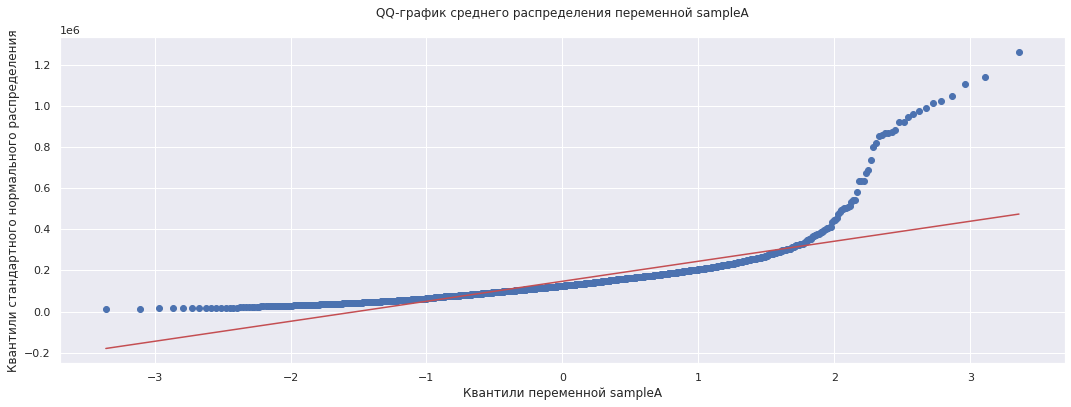

In [ ]:
plt.figure(figsize=(18, 6))

st.probplot(sampleA, dist="norm", plot=pylab)

plt.title('QQ-график среднего распределения переменной sampleA', pad=20)
plt.xlabel('Квантили переменной sampleA')
plt.ylabel('Квантили стандартного нормального распределения')
pylab.show()

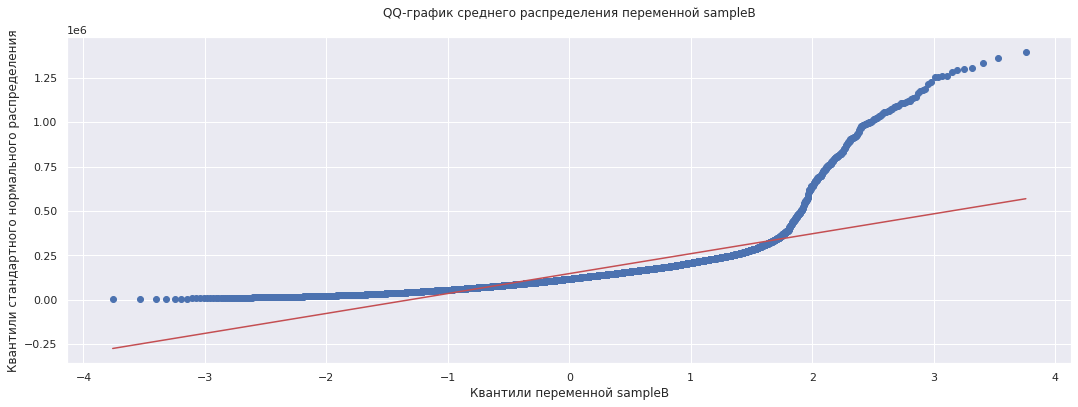

In [ ]:
plt.figure(figsize=(18, 6))

st.probplot(sampleB, dist="norm", plot=pylab)

plt.title('QQ-график среднего распределения переменной sampleB', pad=20)
plt.xlabel('Квантили переменной sampleB')
plt.ylabel('Квантили стандартного нормального распределения')
pylab.show()

Распределения похожи, несмотря на сильную количественную разницу выборок. Если бы синие точки повторяли красную линию, которая бы шла вверх под углом, близким к 45 градусам, данные в переменных были бы распределены нормально. Мы же имеем дело с ненормально распределенными данными. 
При достаточном объеме двух выборок, которым мы располагаем, можно применять t-тест. Однако требуется отсутствие выбросов, а они у нас есть. Плюс дисперсии должны быть равны. Проверим, одинаковые ли они, с помощью теста Левена. 

In [ ]:
test_leven, p = st.levene(sampleA, sampleB)
print('Statistics=%.3f, p-value=%.3f' % (test_leven, p))
alpha = 0.05
if p < alpha:
    print('Отвергаем гипотезу о равенстве дисперсий')
else:
    print('Принимаем гипотезу о равенстве дисперсий')

Statistics=7.868, p-value=0.005
Отвергаем гипотезу о равенстве дисперсий



Из-за выбросов и разных дисперсий t-тест не подходит. Будем использовать непараметрический тест Манна-Уитни: он менее требователен к выборкам, подходит для ненормального распределения.

Проведем тест. Сформулируем гипотезы. Нулевая, по традиции, консервативная. alpha установим на уровне 0,05 - это общепринятое пороговое значение.

    H_0: Средние доходы уходящих клиентов = средним доходам остающихся клиентов
    Н_а: Средние доходы уходящих клиентов ≠ средним доходам остающихся клиентов 

alpha = 0.05

In [ ]:
results = st.mannwhitneyu(sampleA, sampleB, alternative="two-sided")[1]

alpha = 0.05 

print('mannwhitneyu-test:')
print()
print('p-value =', "{0:.3f}".format(results), 'при alpha = 0.05 ')

if results < alpha:
  print('Отвергаем нулевую гипотезу')
else:
  print('Не получилось отвергнуть нулевую гипотезу')

mannwhitneyu-test:

p-value = 0.001 при alpha = 0.05 
Отвергаем нулевую гипотезу


Средние значения зарплат уходящих и остающихся клиентов различались незначительно. Однако график распределения показал, что зарплаты одной и второй группы клиентов концентрируются вокруг разных значений (зарплаты уходящих больше).
Статтест подтвердил наше наблюдение. При малой разнице среднего доходы уходящих клиентов не равны доходам остающихся клиентов.

### Гипотеза 2

    H_0: Доли уходящих клиентов в конкретном городе = долям остающихся клиентов в конкретном городе
    Н_а: Доли уходящих клиентов в конкретном городе ≠ долям остающихся клиентов в конкретном городе  

alpha = 0.05


Поскольку исследуем столбцы с бинарными значениями (0 и 1), для проверки гипотез будем использовать Z-тест.

Определим, сколько клиентов в каждой выборке.

In [ ]:
users_by_city = test\
.pivot_table(index=['churn'], columns=['city'], values = 'userid', aggfunc = 'nunique').reset_index()

users_total = test.groupby('churn')['userid'].nunique()
users_by_city['users_total'] = users_by_city['churn'].apply(lambda x: users_total.loc[x])
users_by_city = users_by_city.set_index('churn')
users_by_city

city,Ростов,Рыбинск,Ярославль,users_total
churn,,,,
0,1153,2213,4744,8106
1,266,416,1089,1770


Для удобства теста напишем функцию.

In [ ]:
def st_test(part0, part1, total0, total1, alpha):  
    """
    Эта функция содержит многострочный докстринг.

    Функция рассчитывает p-value в рамках z-теста. 
    На вход принимает значение доли первой выборки,
    доли второй выборки, общее количество клинетов из
    первой выборки, общее значение клиентов из второй
    выборки, alpha. alpha по умолчанию выставлена на 0.05
    """

    p1 = part0 / total0 
    p2 = part1 / total1 
    p_combined = (part0 + part1) / (total0 + total1) 
    difference = p1 - p2 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/total0 + 1/total1))
    distr = st.norm(0, 1) 
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    return p_value 

Так как тест множественный, применим поправку Бонферрони.

In [ ]:
pd.options.display.max_colwidth = 150
city_pivot = pd.DataFrame(columns=['Группа_1', 'Группа_2', 'Событие', 'p_alpha', 'p_alpha (с поправкой Бонферрони)', 'p_value', 'Результат'])

result_options = ["Отвергаем нулевую гипотезу",
                  "Не получилось отвергнуть нулевую гипотезу"]
 
group_1 = 0
current_row = users_by_city.loc[group_1]
group_2 = 1

alpha_cor = .05 / 3

for event_number in range(3):
    curr_event = users_by_city.columns[event_number]
    p_value_result = st_test(current_row[curr_event], 
                                   users_by_city[curr_event][group_2],
                                   current_row['users_total'],
                                   users_by_city['users_total'][group_2],
                                   alpha = 0.05)
    
    new_row = {'Группа_1': group_1,
               'Группа_2': group_2,
               'Событие': users_by_city.columns[event_number],
               'p_alpha': 0.05,
               'p_alpha (с поправкой Бонферрони)': "{0:.4f}".format(alpha_cor),
               'p_value': "{0:.3f}".format(p_value_result),
               'Результат': result_options[int(p_value_result >= alpha_cor)]}
    city_pivot = city_pivot.append([new_row])
 
city_pivot.index = range(len(city_pivot))
city_pivot



,Группа_1,Группа_2,Событие,p_alpha,p_alpha (с поправкой Бонферрони),p_value,Результат
0,0,1,Ростов,0.05,0.0167,0.382,Не получилось отвергнуть нулевую гипотезу
1,0,1,Рыбинск,0.05,0.0167,0.001,Отвергаем нулевую гипотезу
2,0,1,Ярославль,0.05,0.0167,0.020,Не получилось отвергнуть нулевую гипотезу


В Рыбинске заметны статзначимые различия в долях между уходящими и остающимися клиентами, в Ярославле и Ростове нет.

## Промежуточные выводы. Какие показатели влияют на отток?

Стратегические признаки, влияющие на отток в порядке уменьшения значимости, составленные на основе процента изменений центральных тенденций характеристики:

`equity`, `balance`, `last_activity`, `gender_new`, `products`, `credit_card`, `age`, `score`, `est_salary`.

Какие сегменты уходящих клиентов мы увидели на графике:

`equity` - уходят клиенты с рейтингом 3, 4, 5, 6, 7.

`balance` - жирный хвост из уходящих, которые хранят на счетах суммы от 700000 рублей. Остающихся после этого рубежа заметно меньше, а ведь это ценные клиенты с деньгами.

`last_activity` - активных уходящих больше, чем активных остающихся. 

`gender_new` - мужчины уходят чаще женщин.

`products` - у уходящих клиентов по 2, 3, 4 продукта. Причем почти все клиенты, у которых 4 банковских продукта, собираются уходить.

`credit_card` - клиенты с кредитками уходят чаще, чем клиенты без кредиток.

`age` - уходят клиенты в возрасте 25-35 и 50-60.

`score` - уходят клиенты с рейтингом 825-900.

`est_salary` - уходят клиенты с ожидаемой зарплатой 100000-200000 рублей.

`city` - уходящие и остающиеся клиенты почти равномерно распределены по трем городам. Больше всего и тех и других в Ярославле.

## Сегментируем категории на основе стратегических показателей. Расставим приоритеты. Проверим абсолютные числа и доли уходящих в выделенных нами сегментах.

Напомним рейтинг изменений центральной тенденции характеристик в столбцах между ушедшими и остающимися клиентами.

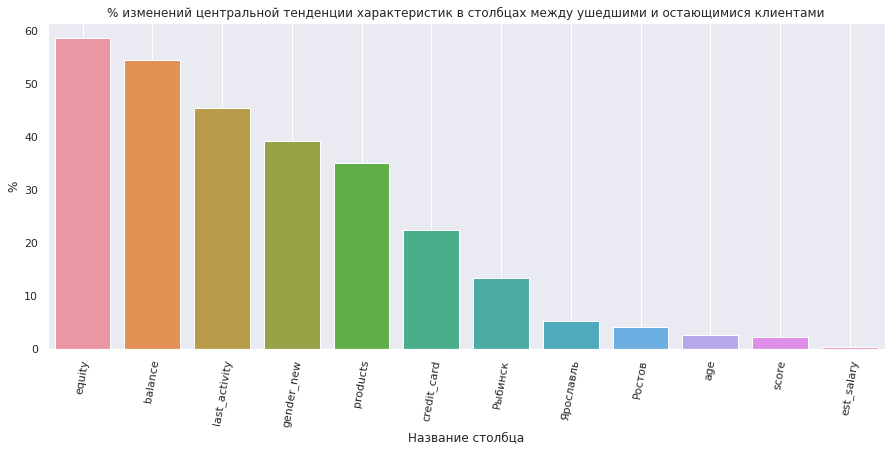

In [ ]:
plt.figure(figsize=(15, 6))

sns.barplot(x='Название столбца', y='% изменений', data=churn_total)

plt.title('% изменений центральной тенденции характеристик в столбцах между ушедшими и остающимися клиентами')
plt.xlabel('Название столбца')
plt.ylabel('%')

plt.grid()
plt.xticks(rotation=80)
plt.show()

### Баллы по активам

In [ ]:
print('Категория "equity" (3):')
print()
df.loc[df['equity'] == 3]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "equity" (3):



,index,churn
0,mean,0.21
1,count,"1,542.00"
2,sum,322.00


In [ ]:
print('Категория "equity" (4):')
print()
df.loc[df['equity'] == 4]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "equity" (4):



,index,churn
0,mean,0.25
1,count,"1,850.00"
2,sum,465.00


In [ ]:
print('Категория "equity" (5):')
print()
df.loc[df['equity'] == 5]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "equity" (5):



,index,churn
0,mean,0.30
1,count,"1,918.00"
2,sum,577.00


In [ ]:
print('Категория "equity" (6):')
print()
df.loc[df['equity'] == 6]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "equity" (6):



,index,churn
0,mean,0.36
1,count,161.00
2,sum,58.00


Объединим сегменты 4 и 5, тем более в них по 20% всех клиентов банка. Остальные сегменты категории в расчет брать не будем, там маленькие абсолютные числа.

In [ ]:
print('Категория "equity" (4 и 5):')
print()
df.loc[((df['equity'] == 4) | (df['equity'] == 5))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "equity" (4 и 5):



,index,churn
0,mean,0.28
1,count,"3,768.00"
2,sum,"1,042.00"


### Баланс

In [ ]:
print('Категория "balance" (700000 +):')
print()
df.loc[df['balance'] > 700000]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "balance" (700000 +):



,index,churn
0,mean,0.34
1,count,"2,901.00"
2,sum,985.00


### Активность

In [ ]:
print('Категория "last_activity" (да):')
print()
df.loc[df['last_activity'] == 1]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "last_activity" (да):



,index,churn
0,mean,0.24
1,count,"5,235.00"
2,sum,"1,280.00"


### Пол

In [ ]:
print('Категория "gender_new" (мужчины):')
print()
df.loc[df['gender_new'] == 1]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "gender_new" (мужчины):



,index,churn
0,mean,0.24
1,count,"5,005.00"
2,sum,"1,183.00"


### Количество продуктов

In [ ]:
print('Категория "products" (2):')
print()
df.loc[df['products'] == 2]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "products" (2):



,index,churn
0,mean,0.19
1,count,"5,107.00"
2,sum,979.00


In [ ]:
print('Категория "products" (3):')
print()
df.loc[df['products'] == 3]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "products" (3):



,index,churn
0,mean,0.28
1,count,"1,046.00"
2,sum,298.00


In [ ]:
print('Категория "products" (4):')
print()
df.loc[df['products'] == 4]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "products" (4):



,index,churn
0,mean,0.63
1,count,474.00
2,sum,300.00


Хотя в сегменте "4 продукта" 63% клиентов собрались уходить, сам сегмент маленький. Гораздо интереснее работать с сегментов "2 продукта". 19 процентов уходит, зато это почти тысяча человек. Оставим его.

### Наличие кредитки


In [ ]:
print('Категория "cradit_card" (да):')
print()
df.loc[df['credit_card'] == 1]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "cradit_card" (да):



,index,churn
0,mean,0.15
1,count,"6,801.00"
2,sum,"1,002.00"


Не очень интересный сегмент. 15% уходящих. Ниже, чем процент уходящих от общего числа клиентов. 

### Возраст

In [ ]:
print('Категория "age" (25-35):')
print()
df.loc[((df['age'] >= 25) & (df['age'] <= 35))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "age" (25-35):



,index,churn
0,mean,0.22
1,count,"3,100.00"
2,sum,672.00


In [ ]:
print('Категория "age" (50-60):')
print()
df.loc[((df['age'] >= 50) & (df['age'] <= 60))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "age" (50-60):



,index,churn
0,mean,0.26
1,count,"1,774.00"
2,sum,469.00


### Баллы скоринга

In [ ]:
print('Категория "score" (825-900):')
print()
df.loc[((df['score'] > 825) & (df['score'] < 900))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "score" (825-900):



,index,churn
0,mean,0.25
1,count,"3,834.00"
2,sum,965.00


### Зарплата

In [ ]:
print('Категория "est_salary" (100000-250000):')
print()
df.loc[((df['est_salary'] >= 100000) & (df['est_salary'] <= 250000))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "est_salary" (100000-250000):



,index,churn
0,mean,0.20
1,count,"5,163.00"
2,sum,"1,033.00"


Сегмент 100000-200000 давал 20% уходящих, а именно - 876 человек. Увеличили сегмент до 250000. Процент уходящих остался тот же, зато число уходящих стало больше 1000 на 5100 клиентов в сегменте вообще.

### Сравним выборочно совместные признаки

In [ ]:
print('Категория "balance" (700000 +) + категория "age" (50-60):')
print()
df.loc[((df['est_salary'] >= 100000) & (((df['age'] >= 50) & (df['age'] <= 60))))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "balance" (700000 +) + категория "age" (50-60):



,index,churn
0,mean,0.27
1,count,968.00
2,sum,257.00


In [ ]:
print('Категория "last_activity" (да) + категория "products" (2):')
print()
df.loc[(df['last_activity'] == 1) & (df['products'] == 2)]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "last_activity" (да) + категория "products" (2):



,index,churn
0,mean,0.28
1,count,"2,632.00"
2,sum,732.00


In [ ]:
print('Категория "gender_new" (мужчины) + категория "est_salary" (100000-250000):')
print()
df.loc[((df['gender_new'] == 1) & (((df['est_salary'] >= 100000) & (df['est_salary'] <= 250000))))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "gender_new" (мужчины) + категория "est_salary" (100000-250000):



,index,churn
0,mean,0.24
1,count,"2,717.00"
2,sum,663.00


In [ ]:
print('Категория "score" (825-900) + категория "est_salary" (100000-250000):')
print()
df.loc[((df['score'] > 825) & (df['score'] < 900) & (((df['est_salary'] >= 100000) & (df['est_salary'] <= 250000))))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "score" (825-900) + категория "est_salary" (100000-250000):



,index,churn
0,mean,0.28
1,count,"1,989.00"
2,sum,565.00


In [ ]:
print('Категория "balance" (700000 +) + категория "est_salary" (100000-250000):')
print()
df.loc[((df['balance'] > 700000) & (((df['est_salary'] >= 100000) & (df['est_salary'] <= 250000))))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "balance" (700000 +) + категория "est_salary" (100000-250000):



,index,churn
0,mean,0.39
1,count,"1,673.00"
2,sum,652.00


39% клиентов с балансом более 700000 и зарплатой 100000-250000! Однозначно в первую очередь уходят клиенты с деньгами.

## Общие выводы и рекомендации

Итак, что мы обнаружили?

Сильные выбросы по балансу и зарплатам (максимальная зарплата - 1 млн. 395 тыс. руб.,максимальный баланс > 119 млн. руб.).

Мужчины и женщины распределены поровну как клиенты банка. 

Клиентское ядро - 35-50 лет. Максимальный возраст клиента - 86 лет.

Статистика доказывает, что зарплаты уходящих и остающихся клиентов распределены по-разному. В Рыбинске заметны статзначимые различия в долях между уходящими и остающимися клиентами, в Ярославле и Ростове нет.

18% клиентов банка (1820 человек) - отточные. 

Сегменты по концентрации отточных клиентов следующие:

In [ ]:
print('Категория "balance" (700000 +):')
print()
df.loc[df['balance'] > 700000]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "balance" (700000 +):



,index,churn
0,mean,0.34
1,count,"2,901.00"
2,sum,985.00


In [ ]:
print('Категория "gender_new" (мужчины):')
print()
df.loc[df['gender_new'] == 1]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "gender_new" (мужчины):



,index,churn
0,mean,0.24
1,count,"5,005.00"
2,sum,"1,183.00"


In [ ]:
print('Категория "age" (50-60):')
print()
df.loc[((df['age'] >= 50) & (df['age'] <= 60))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "age" (50-60):



,index,churn
0,mean,0.26
1,count,"1,774.00"
2,sum,469.00


In [ ]:
print('Категория "score" (825-900):')
print()
df.loc[((df['score'] > 825) & (df['score'] < 900))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "score" (825-900):



,index,churn
0,mean,0.25
1,count,"3,834.00"
2,sum,965.00


In [ ]:
print('Категория "equity" (4 и 5):')
print()
df.loc[((df['equity'] == 4) | (df['equity'] == 5))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "equity" (4 и 5):



,index,churn
0,mean,0.28
1,count,"3,768.00"
2,sum,"1,042.00"


In [ ]:
print('Категория "products" (4):')
print()
df.loc[df['products'] == 4]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "products" (4):



,index,churn
0,mean,0.63
1,count,474.00
2,sum,300.00


Из совместных признаков, в первую очередь, можно выделить: 

In [ ]:
print('Категория "balance" (700000 +) + категория "est_salary" (100000-250000):')
print()
df.loc[((df['balance'] > 700000) & (((df['est_salary'] >= 100000) & (df['est_salary'] <= 250000))))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "balance" (700000 +) + категория "est_salary" (100000-250000):



,index,churn
0,mean,0.39
1,count,"1,673.00"
2,sum,652.00


In [ ]:
print('Категория "score" (825-900) + категория "est_salary" (100000-250000):')
print()
df.loc[((df['score'] > 825) & (df['score'] < 900) & (((df['est_salary'] >= 100000) & (df['est_salary'] <= 250000))))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "score" (825-900) + категория "est_salary" (100000-250000):



,index,churn
0,mean,0.28
1,count,"1,989.00"
2,sum,565.00


In [ ]:
print('Категория "balance" (700000 +) + категория "age" (50-60):')
print()
df.loc[((df['est_salary'] >= 100000) & (((df['age'] >= 50) & (df['age'] <= 60))))]['churn'].agg({'count', 'sum', 'mean'}).reset_index()

Категория "balance" (700000 +) + категория "age" (50-60):



,index,churn
0,mean,0.27
1,count,968.00
2,sum,257.00


Из банка уходят активные клиенты, которые знают, что такое банковские продукты, пользуются ими, выбирают лучшее. Уходят те, у кого есть деньги на счету.

Рекомендации:
- спецобслуживание для клиентов с зарплатов более 100 тысяч. Сюда могут входить бонусы у компаний-партнеров, льготное страхование, дополнительные счета, в том числе валютные, беспроцентные переводы, программа лояльности, подчеркивающая элитарность клиента; персональный менеджер. Клиента с деньгами надо уважить. 
- новые продукты со вкладами. Накопительные вклады, вклады по повышенной ставке на суммы от 700 000 руб. Инвестиционные продукты, чтоб было, куда вложить средства. Спецвклады для консервативных клиентов отточной категории 50-60 лет. Деньги на счетах клиентов есть, нужно эти средства удерживать.
- Для клиентов отточной категории 50-60 лет страховые продукты, банковские карты с программой лояльности, например, от сетей городских аптек, или скидка при оплате городского общественного транспорта картой банка. 
- специальные ипотечные программы для клиентов 25-35 лет. Даже если они уйдут, платить будут все равно по счету в данном банке.
- специальные кредитные программы для клиентов с высоким кредитным скорингом, данная категория тоже отточная.